## Libraries imports:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score

# Dataframe for The Riyadh Center :

In [3]:
df_Center = pd.read_csv("final_Central.csv")
df_Center.head()

,Unnamed: 0,shoptitle,prices,areaa,links,front,street_width,age
0,0,محل للإيجار في شارع شعبة العنبري ، حي العود ، ...,"60,000 ريال",100 م²,/محلات-للإيجار/الرياض/وسط-الرياض/حي-العود/شارع...,شرق,30 م,جديد
1,1,محل للإيجار في طريق عمر بن عبد العزيز الفرعي ،...,"276,000 ريال",460 م²,/محلات-للإيجار/الرياض/وسط-الرياض/حي-الربوة/طري...,جنوب,60 م,جديد
2,2,محل للإيجار في شارع الأمير متعب بن عبدالعزيز ،...,"80,000 ريال",125 م²,/محلات-للإيجار/الرياض/وسط-الرياض/حي-الربوة/شار...,غرب,36 م,6 سنة
3,3,محل للإيجار في شارع احمد بن فارس ، حي ثليم ، ا...,"16,000 ريال",50 م²,/محلات-للإيجار/الرياض/وسط-الرياض/حي-ثليم/شارع-...,شرق,20 م,5 سنة
4,4,محل للإيجار في شارع جرير ، حي جرير ، الرياض ، ...,"17,500 ريال",70 م²,/محلات-للإيجار/الرياض/وسط-الرياض/حي-جرير/شارع-...,شمال,NaN,NaN


In [4]:
df_Center['Region'] = "Center" #Add new coulmn tell us this dataframe for Riyadh center
df_Center.head()

,Unnamed: 0,shoptitle,prices,areaa,links,front,street_width,age,Region
0,0,محل للإيجار في شارع شعبة العنبري ، حي العود ، ...,"60,000 ريال",100 م²,/محلات-للإيجار/الرياض/وسط-الرياض/حي-العود/شارع...,شرق,30 م,جديد,Center
1,1,محل للإيجار في طريق عمر بن عبد العزيز الفرعي ،...,"276,000 ريال",460 م²,/محلات-للإيجار/الرياض/وسط-الرياض/حي-الربوة/طري...,جنوب,60 م,جديد,Center
2,2,محل للإيجار في شارع الأمير متعب بن عبدالعزيز ،...,"80,000 ريال",125 م²,/محلات-للإيجار/الرياض/وسط-الرياض/حي-الربوة/شار...,غرب,36 م,6 سنة,Center
3,3,محل للإيجار في شارع احمد بن فارس ، حي ثليم ، ا...,"16,000 ريال",50 م²,/محلات-للإيجار/الرياض/وسط-الرياض/حي-ثليم/شارع-...,شرق,20 م,5 سنة,Center
4,4,محل للإيجار في شارع جرير ، حي جرير ، الرياض ، ...,"17,500 ريال",70 م²,/محلات-للإيجار/الرياض/وسط-الرياض/حي-جرير/شارع-...,شمال,NaN,NaN,Center


In [5]:
df_Center.drop(['shoptitle','links', 'Unnamed: 0'],axis=1 , inplace=True) #drop unneeded columns

In [6]:
df_Center

,prices,areaa,front,street_width,age,Region
0,"60,000 ريال",100 م²,شرق,30 م,جديد,Center
1,"276,000 ريال",460 م²,جنوب,60 م,جديد,Center
2,"80,000 ريال",125 م²,غرب,36 م,6 سنة,Center
3,"16,000 ريال",50 م²,شرق,20 م,5 سنة,Center
4,"17,500 ريال",70 م²,شمال,NaN,NaN,Center
...,...,...,...,...,...,...
115,"10,000 ريال",24 م²,شرق,5 م,25 سنة,Center
116,"25,000 ريال",50 م²,غرب,10 م,20 سنة,Center
117,"90,000 ريال",120 م²,شمال غربي,35 م,10 سنة,Center
118,"13,500 ريال",30 م²,جنوب,15 م,7 سنة,Center


# Dataframe for The Riyadh North :

In [7]:
df_North = pd.read_csv("site_north.csv")
df_North.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,shoptitle,prices,areaa,links,front,street_width,age
0,0,0,0,محل للإيجار في طريق الأمير تركي بن عبدالعزيز ا...,"600,000 ريال",250 م²,/محلات-للإيجار/الرياض/شمال-الرياض/حي-حطين/طريق...,شرق,NaN,NaN
1,1,1,1,محل للإيجار في الرياض,"15,000 ريال",52 م²,/محلات-للإيجار/الرياض/شمال-الرياض/حي-العارض/ال...,غرب,30 م,جديد
2,2,2,2,محل للإيجار في طريق ابي بكر الصديق ، حي النرجس...,"60,000 ريال",200 م²,/محلات-للإيجار/الرياض/شمال-الرياض/حي-النرجس/طر...,غرب,60 م,جديد
3,3,3,3,محل للإيجار في حي العارض ، الرياض ، الرياض,"40,000 ريال",80 م²,/محلات-للإيجار/الرياض/شمال-الرياض/حي-العارض/حي...,غرب,30 م,جديد
4,4,4,4,محل للإيجار في الرياض,"20,000 ريال",80 م²,/محلات-للإيجار/الرياض/شمال-الرياض/حي-العارض/ال...,جنوب,30 م,5 سنة


In [8]:
df_North['Region'] = "North" #Add new coulmn tell us this dataframe for Riyadh North
df_North.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,shoptitle,prices,areaa,links,front,street_width,age,Region
0,0,0,0,محل للإيجار في طريق الأمير تركي بن عبدالعزيز ا...,"600,000 ريال",250 م²,/محلات-للإيجار/الرياض/شمال-الرياض/حي-حطين/طريق...,شرق,NaN,NaN,North
1,1,1,1,محل للإيجار في الرياض,"15,000 ريال",52 م²,/محلات-للإيجار/الرياض/شمال-الرياض/حي-العارض/ال...,غرب,30 م,جديد,North
2,2,2,2,محل للإيجار في طريق ابي بكر الصديق ، حي النرجس...,"60,000 ريال",200 م²,/محلات-للإيجار/الرياض/شمال-الرياض/حي-النرجس/طر...,غرب,60 م,جديد,North
3,3,3,3,محل للإيجار في حي العارض ، الرياض ، الرياض,"40,000 ريال",80 م²,/محلات-للإيجار/الرياض/شمال-الرياض/حي-العارض/حي...,غرب,30 م,جديد,North
4,4,4,4,محل للإيجار في الرياض,"20,000 ريال",80 م²,/محلات-للإيجار/الرياض/شمال-الرياض/حي-العارض/ال...,جنوب,30 م,5 سنة,North


In [9]:
df_North.drop(['shoptitle','links', 'Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1 , inplace=True)#drop unneeded columns

In [10]:
df_North

,prices,areaa,front,street_width,age,Region
0,"600,000 ريال",250 م²,شرق,NaN,NaN,North
1,"15,000 ريال",52 م²,غرب,30 م,جديد,North
2,"60,000 ريال",200 م²,غرب,60 م,جديد,North
3,"40,000 ريال",80 م²,غرب,30 م,جديد,North
4,"20,000 ريال",80 م²,جنوب,30 م,5 سنة,North
...,...,...,...,...,...,...
315,"50,000 ريال",40 م²,جنوب,60 م,5 سنة,North
316,"6,000 ريال",150 م²,شرق,NaN,NaN,North
317,"70,000 ريال",52 م²,شرق,80 م,20 سنة,North
318,"150,000 ريال",135 م²,غرب,36 م,13 سنة,North


# Dataframe for The Riyadh West :

In [11]:
df_West = pd.read_csv("site_west.csv")
df_West.head()

,Unnamed: 0,Unnamed: 0.1,shoptitle,prices,areaa,links,front,street_width,age
0,0,0,محل للإيجار في شارع سدره ، حي طويق ، الرياض ، ...,"16,000 ريال",50 م²,/محلات-للإيجار/الرياض/غرب-الرياض/حي-طويق/شارع-...,شمال غربي,20 م,15 سنة
1,1,1,محل للإيجار في شارع حلب ، حي ظهرة لبن ، الرياض...,"80,000 ريال",132 م²,/محلات-للإيجار/الرياض/غرب-الرياض/حي-ظهرة-لبن/ش...,شرق,30 م,جديد
2,2,2,محل للإيجار في شارع احمد بن منيع ، حي الحزم ، ...,"9,000 ريال",30 م²,/محلات-للإيجار/الرياض/غرب-الرياض/حي-الحزم/شارع...,جنوب,NaN,NaN
3,3,3,محل للإيجار في شارع الجوهرة بنت ابن معمر ، حي ...,"15,000 ريال",20 م²,/محلات-للإيجار/الرياض/غرب-الرياض/حي-الشرفية/شا...,شمال,30 م,20 سنة
4,4,4,محل للإيجار في شارع الشيخ اسحاق بن عبدالرحمن ب...,"7,000 ريال",28 م²,/محلات-للإيجار/الرياض/غرب-الرياض/حي-الزهرة/شار...,شمال,NaN,NaN


In [12]:
df_West['Region'] = "West" #Add new coulmn tell us this dataframe for Riyadh West
df_West.head()

,Unnamed: 0,Unnamed: 0.1,shoptitle,prices,areaa,links,front,street_width,age,Region
0,0,0,محل للإيجار في شارع سدره ، حي طويق ، الرياض ، ...,"16,000 ريال",50 م²,/محلات-للإيجار/الرياض/غرب-الرياض/حي-طويق/شارع-...,شمال غربي,20 م,15 سنة,West
1,1,1,محل للإيجار في شارع حلب ، حي ظهرة لبن ، الرياض...,"80,000 ريال",132 م²,/محلات-للإيجار/الرياض/غرب-الرياض/حي-ظهرة-لبن/ش...,شرق,30 م,جديد,West
2,2,2,محل للإيجار في شارع احمد بن منيع ، حي الحزم ، ...,"9,000 ريال",30 م²,/محلات-للإيجار/الرياض/غرب-الرياض/حي-الحزم/شارع...,جنوب,NaN,NaN,West
3,3,3,محل للإيجار في شارع الجوهرة بنت ابن معمر ، حي ...,"15,000 ريال",20 م²,/محلات-للإيجار/الرياض/غرب-الرياض/حي-الشرفية/شا...,شمال,30 م,20 سنة,West
4,4,4,محل للإيجار في شارع الشيخ اسحاق بن عبدالرحمن ب...,"7,000 ريال",28 م²,/محلات-للإيجار/الرياض/غرب-الرياض/حي-الزهرة/شار...,شمال,NaN,NaN,West


In [13]:
df_West.drop(['shoptitle','links', 'Unnamed: 0','Unnamed: 0.1'],axis=1 , inplace=True) #drop unneeded columns

In [14]:
df_West

,prices,areaa,front,street_width,age,Region
0,"16,000 ريال",50 م²,شمال غربي,20 م,15 سنة,West
1,"80,000 ريال",132 م²,شرق,30 م,جديد,West
2,"9,000 ريال",30 م²,جنوب,NaN,NaN,West
3,"15,000 ريال",20 م²,شمال,30 م,20 سنة,West
4,"7,000 ريال",28 م²,شمال,NaN,NaN,West
...,...,...,...,...,...,...
455,"100,000 ريال",108 م²,شمال,NaN,NaN,West
456,"13,000 ريال",20 م²,شمال,40 م,27 سنة,West
457,"24,000 ريال",150 م²,جنوب,20 م,20 سنة,West
458,"54,000 ريال",216 م²,شرق,40 م,جديد,West


# Dataframe for The Riyadh South :

In [15]:
df_South = pd.read_csv("site_south.csv")
df_South.head()

,Unnamed: 0,Unnamed: 0.1,shoptitle,prices,areaa,links,front,street_width,age
0,0,0,محل للإيجار في شارع وادي التسرير ، حي بدر ، ال...,"90,000 ريال",1200 م²,/محلات-للإيجار/الرياض/جنوب-الرياض/حي-بدر/شارع-...,3 شوارع,60 م,5 سنة
1,1,1,محل للإيجار في طريق النصر ، حي المصانع ، الريا...,"30,000 ريال",122 م²,/محلات-للإيجار/الرياض/جنوب-الرياض/حي-المصانع/ط...,شمال,60 م,جديد
2,2,2,محل للإيجار في شارع المثنى بن حارثة ، حي الشفا...,"25,000 ريال",42 م²,/محلات-للإيجار/الرياض/جنوب-الرياض/حي-الشفا/شار...,شرق,30 م,15 سنة
3,3,3,محل للإيجار في شارع روض الجوار ، حي الدار البي...,"25,000 ريال",150 م²,/محلات-للإيجار/الرياض/جنوب-الرياض/حي-الدار-الب...,جنوب,30 م,2 سنة
4,4,4,محل للإيجار في شارع نهاوند ، حي العزيزية ، الر...,"5,000 ريال",26 م²,/محلات-للإيجار/الرياض/جنوب-الرياض/حي-العزيزية/...,جنوب,30 م,18 سنة


In [16]:
df_South['Region'] = "South" #Add new coulmn tell us this dataframe for Riyadh South
df_South.head()

,Unnamed: 0,Unnamed: 0.1,shoptitle,prices,areaa,links,front,street_width,age,Region
0,0,0,محل للإيجار في شارع وادي التسرير ، حي بدر ، ال...,"90,000 ريال",1200 م²,/محلات-للإيجار/الرياض/جنوب-الرياض/حي-بدر/شارع-...,3 شوارع,60 م,5 سنة,South
1,1,1,محل للإيجار في طريق النصر ، حي المصانع ، الريا...,"30,000 ريال",122 م²,/محلات-للإيجار/الرياض/جنوب-الرياض/حي-المصانع/ط...,شمال,60 م,جديد,South
2,2,2,محل للإيجار في شارع المثنى بن حارثة ، حي الشفا...,"25,000 ريال",42 م²,/محلات-للإيجار/الرياض/جنوب-الرياض/حي-الشفا/شار...,شرق,30 م,15 سنة,South
3,3,3,محل للإيجار في شارع روض الجوار ، حي الدار البي...,"25,000 ريال",150 م²,/محلات-للإيجار/الرياض/جنوب-الرياض/حي-الدار-الب...,جنوب,30 م,2 سنة,South
4,4,4,محل للإيجار في شارع نهاوند ، حي العزيزية ، الر...,"5,000 ريال",26 م²,/محلات-للإيجار/الرياض/جنوب-الرياض/حي-العزيزية/...,جنوب,30 م,18 سنة,South


In [17]:
df_South.drop(['shoptitle','links', 'Unnamed: 0','Unnamed: 0.1'],axis=1 , inplace=True)#drop unneeded columns

In [18]:
df_South

,prices,areaa,front,street_width,age,Region
0,"90,000 ريال",1200 م²,3 شوارع,60 م,5 سنة,South
1,"30,000 ريال",122 م²,شمال,60 م,جديد,South
2,"25,000 ريال",42 م²,شرق,30 م,15 سنة,South
3,"25,000 ريال",150 م²,جنوب,30 م,2 سنة,South
4,"5,000 ريال",26 م²,جنوب,30 م,18 سنة,South
...,...,...,...,...,...,...
175,"66,000 ريال",600 م²,غرب,22 م,26 سنة,South
176,"9,000 ريال",24 م²,غرب,30 م,32 سنة,South
177,"1,000,000 ريال",2000 م²,شرق,60 م,جديد,South
178,"7,000 ريال",28 م²,شمال,30 م,15 سنة,South


# Dataframe for The Riyadh East :

In [19]:
df_East = pd.read_csv("final_east.csv")
df_East.head()

,Unnamed: 0,Unnamed: 0.1,shoptitle,prices,areaa,links,front,street_width,age
0,0,0,"محل للإيجار في شارع ابي جعفر المنصور, حي الشهد...","115,500 ريال",75 م²,/محلات-للإيجار/الرياض/شرق-الرياض/حي-الشهداء/شا...,شمال غربي,36 م,4 سنة
1,1,1,محل للإيجار في حي الخليج ، الرياض ، الرياض,"15,000 ريال",44 م²,/محلات-للإيجار/الرياض/شرق-الرياض/حي-الخليج/حي-...,شرق,30 م,جديد
2,2,2,محل للإيجار في شارع الصحابة ، حي المونسية ، ال...,"35,000 ريال",100 م²,/محلات-للإيجار/الرياض/شرق-الرياض/حي-المونسية/ش...,شرق,5 م,2 سنة
3,3,3,محل للإيجار في حي القادسية ، الرياض ، الرياض,"20,000 ريال",36 م²,/محلات-للإيجار/الرياض/شرق-الرياض/حي-القادسية/ح...,شمال,30 م,5 سنة
4,4,4,محل للإيجار في شارع فضيلة السيد محمد حسين أفند...,"60,000 ريال",80 م²,/محلات-للإيجار/الرياض/شرق-الرياض/حي-الرمال/شار...,شمال,30 م,جديد


In [20]:
df_East['Region'] = "East" #Add new coulmn tell us this dataframe for Riyadh East
df_East.head()

,Unnamed: 0,Unnamed: 0.1,shoptitle,prices,areaa,links,front,street_width,age,Region
0,0,0,"محل للإيجار في شارع ابي جعفر المنصور, حي الشهد...","115,500 ريال",75 م²,/محلات-للإيجار/الرياض/شرق-الرياض/حي-الشهداء/شا...,شمال غربي,36 م,4 سنة,East
1,1,1,محل للإيجار في حي الخليج ، الرياض ، الرياض,"15,000 ريال",44 م²,/محلات-للإيجار/الرياض/شرق-الرياض/حي-الخليج/حي-...,شرق,30 م,جديد,East
2,2,2,محل للإيجار في شارع الصحابة ، حي المونسية ، ال...,"35,000 ريال",100 م²,/محلات-للإيجار/الرياض/شرق-الرياض/حي-المونسية/ش...,شرق,5 م,2 سنة,East
3,3,3,محل للإيجار في حي القادسية ، الرياض ، الرياض,"20,000 ريال",36 م²,/محلات-للإيجار/الرياض/شرق-الرياض/حي-القادسية/ح...,شمال,30 م,5 سنة,East
4,4,4,محل للإيجار في شارع فضيلة السيد محمد حسين أفند...,"60,000 ريال",80 م²,/محلات-للإيجار/الرياض/شرق-الرياض/حي-الرمال/شار...,شمال,30 م,جديد,East


In [21]:
df_East.drop(['shoptitle','links', 'Unnamed: 0','Unnamed: 0.1'],axis=1 , inplace=True)#drop unneeded columns

In [22]:
df_East

,prices,areaa,front,street_width,age,Region
0,"115,500 ريال",75 م²,شمال غربي,36 م,4 سنة,East
1,"15,000 ريال",44 م²,شرق,30 م,جديد,East
2,"35,000 ريال",100 م²,شرق,5 م,2 سنة,East
3,"20,000 ريال",36 م²,شمال,30 م,5 سنة,East
4,"60,000 ريال",80 م²,شمال,30 م,جديد,East
...,...,...,...,...,...,...
455,"13,000 ريال",40 م²,شمال,NaN,NaN,East
456,"55,000 ريال",8 م²,جنوب,30 م,15 سنة,East
457,"25,000 ريال",72 م²,غرب,30 م,18 سنة,East
458,"250,000 ريال",1000 م²,شرق,40 م,جديد,East


# Concat Dataframes:

In [23]:
df_Riyadh_shops = pd.concat([df_Center ,df_North, df_West, df_South, df_East]) #concat all dataframes
df_Riyadh_shops

,prices,areaa,front,street_width,age,Region
0,"60,000 ريال",100 م²,شرق,30 م,جديد,Center
1,"276,000 ريال",460 م²,جنوب,60 م,جديد,Center
2,"80,000 ريال",125 م²,غرب,36 م,6 سنة,Center
3,"16,000 ريال",50 م²,شرق,20 م,5 سنة,Center
4,"17,500 ريال",70 م²,شمال,NaN,NaN,Center
...,...,...,...,...,...,...
455,"13,000 ريال",40 م²,شمال,NaN,NaN,East
456,"55,000 ريال",8 م²,جنوب,30 م,15 سنة,East
457,"25,000 ريال",72 م²,غرب,30 م,18 سنة,East
458,"250,000 ريال",1000 م²,شرق,40 م,جديد,East


# Data Cleaning...

In [24]:
df_Riyadh_shops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 0 to 459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prices        1540 non-null   object
 1   areaa         1540 non-null   object
 2   front         1540 non-null   object
 3   street_width  1208 non-null   object
 4   age           1208 non-null   object
 5   Region        1540 non-null   object
dtypes: object(6)
memory usage: 84.2+ KB


### Remove Specific Characters:

In [25]:
df_Riyadh_shops.street_width = df_Riyadh_shops.street_width.str.replace('م','').astype('float') #remove & change type

In [26]:
df_Riyadh_shops.age = df_Riyadh_shops.age.str.replace('سنة','') 

In [27]:
df_Riyadh_shops['age'] = df_Riyadh_shops['age'].replace({'جديد':'1'}, inplace = False).astype('float')#remove & change type

In [28]:
df_Riyadh_shops.areaa = df_Riyadh_shops.areaa.str.replace('م²','').astype('float') #remove & change type

In [29]:
df_Riyadh_shops.prices = df_Riyadh_shops.prices.str.replace('ريال','')
df_Riyadh_shops.prices = df_Riyadh_shops.prices.str.replace(',','').astype('float')#remove & change type

In [30]:
df_Riyadh_shops.isna().sum()

prices            0
areaa             0
front             0
street_width    332
age             332
Region            0
dtype: int64

In [31]:
df_Riyadh_shops.dropna(inplace=True) #drop Nulls

In [32]:
sum(df_Riyadh_shops.duplicated())

177

In [33]:
df_Riyadh_shops.drop_duplicates(inplace=True) #drop duplicated rows

In [34]:
sum(df_Riyadh_shops.duplicated())

0

In [35]:
df_Riyadh_shops.info() #Done.. Data is clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   prices        1031 non-null   float64
 1   areaa         1031 non-null   float64
 2   front         1031 non-null   object 
 3   street_width  1031 non-null   float64
 4   age           1031 non-null   float64
 5   Region        1031 non-null   object 
dtypes: float64(4), object(2)
memory usage: 56.4+ KB


In [36]:
df_Riyadh_shops = df_Riyadh_shops.reset_index(drop=True) #reset index

In [37]:
df_Riyadh_shops #look to data

,prices,areaa,front,street_width,age,Region
0,60000.0,100.0,شرق,30.0,1.0,Center
1,276000.0,460.0,جنوب,60.0,1.0,Center
2,80000.0,125.0,غرب,36.0,6.0,Center
3,16000.0,50.0,شرق,20.0,5.0,Center
4,100000.0,155.0,جنوب,60.0,5.0,Center
...,...,...,...,...,...,...
1026,22000.0,35.0,غرب,36.0,12.0,East
1027,42000.0,60.0,غرب,60.0,13.0,East
1028,55000.0,8.0,جنوب,30.0,15.0,East
1029,250000.0,1000.0,شرق,40.0,1.0,East


In [38]:
df_Riyadh_shops['prices'].value_counts(ascending=True)

2800000.0     1
228750.0      1
12500.0       1
86000.0       1
11500.0       1
             ..
60000.0      41
15000.0      43
25000.0      45
50000.0      47
30000.0      49
Name: prices, Length: 199, dtype: int64

In [39]:
df_Riyadh_shops['prices'][df_Riyadh_shops['prices']< 8000] = None
df_Riyadh_shops.dropna(subset = ["prices"], inplace=True)

<ipython-input-39-55408d4d9dfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Riyadh_shops['prices'][df_Riyadh_shops['prices']< 8000] = None


In [40]:
df_Riyadh_shops['prices'][df_Riyadh_shops['prices']> 2000000] = None
df_Riyadh_shops.dropna(subset = ["prices"], inplace=True)

<ipython-input-40-30fcfc7e99fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Riyadh_shops['prices'][df_Riyadh_shops['prices']> 2000000] = None


In [41]:
df_Riyadh_shops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 1030
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   prices        970 non-null    float64
 1   areaa         970 non-null    float64
 2   front         970 non-null    object 
 3   street_width  970 non-null    float64
 4   age           970 non-null    float64
 5   Region        970 non-null    object 
dtypes: float64(4), object(2)
memory usage: 53.0+ KB


### Translate Arabic content...

In [42]:
df_Riyadh_shops['front']= df_Riyadh_shops['front'].replace({'شرق' :'east' ,'جنوب' : 'South' , 'غرب' : 'West','شمال': 'North','شمال شرقي': 'Northeast','جنوب شرقي':'Southeast','جنوب غربي':'Southwest','3 شوارع': 'three_Streets','شمال غربي':'Northwest','4 شوارع':'four_Street'},inplace=False)

# Exploratory Data Analysis..

In [43]:
df_Riyadh_shops.corr()

,prices,areaa,street_width,age
prices,1.000000,0.655162,0.206849,-0.089376
areaa,0.655162,1.000000,0.133041,-0.070835
street_width,0.206849,0.133041,1.000000,-0.145140
age,-0.089376,-0.070835,-0.145140,1.000000


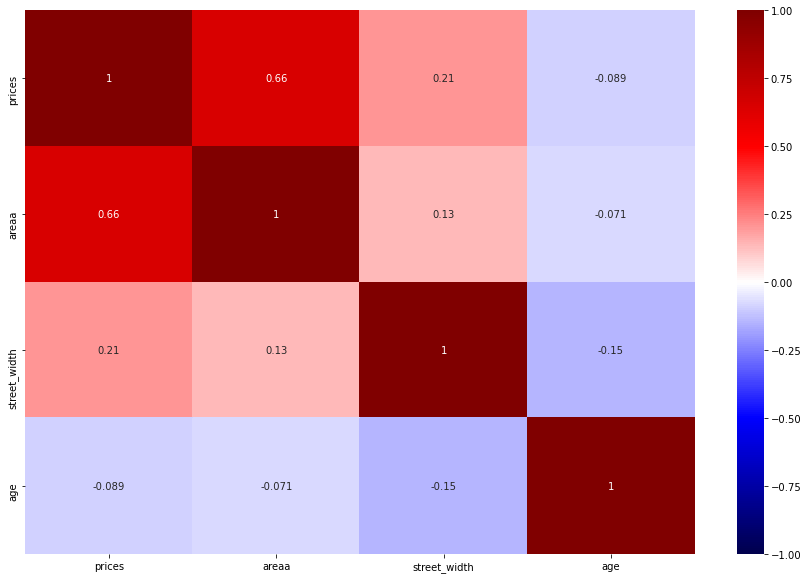

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (15,10))
sns.heatmap(df_Riyadh_shops.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

# Experment

C:\Users\shaha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


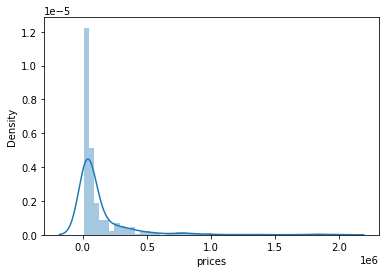

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_Riyadh_shops['prices']) #Price before log
plt.show()

C:\Users\shaha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


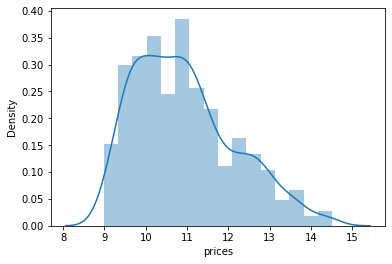

In [46]:
df_Riyadh_shops['prices'] = np.log(df_Riyadh_shops['prices']) #price after log
sns.distplot(df_Riyadh_shops['prices'])
plt.show()

C:\Users\shaha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


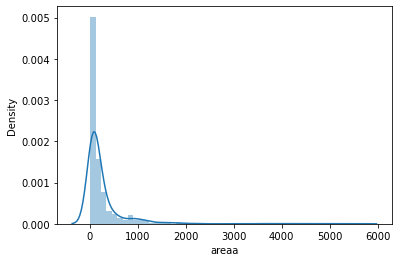

In [47]:
sns.distplot(df_Riyadh_shops['areaa']) #Area befor log
plt.show()

C:\Users\shaha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


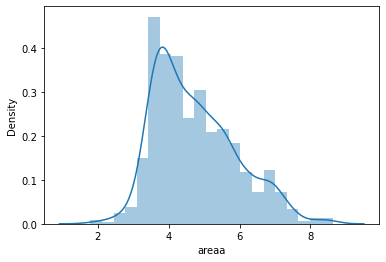

In [48]:
df_Riyadh_shops['areaa'] = np.log(df_Riyadh_shops['areaa']) #Area after log
sns.distplot(df_Riyadh_shops['areaa'])
plt.show()

# Pre-processing

In [49]:
df_Riyadh_shops = pd.get_dummies(df_Riyadh_shops) #convert all categorical data to numeric
df_Riyadh_shops

,prices,areaa,street_width,age,front_North,front_Northeast,front_Northwest,front_South,front_Southeast,front_Southwest,front_West,front_east,front_four_Street,front_three_Streets,Region_Center,Region_East,Region_North,Region_South,Region_West
0,11.002100,4.605170,30.0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,12.528156,6.131226,60.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,11.289782,4.828314,36.0,6.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,9.680344,3.912023,20.0,5.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,11.512925,5.043425,60.0,5.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,9.998798,3.555348,36.0,12.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1027,10.645425,4.094345,60.0,13.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1028,10.915088,2.079442,30.0,15.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1029,12.429216,6.907755,40.0,1.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


# Splitting Data
### Split To X & Y:

In [50]:
df_Riyadh_shops.columns

Index(['prices', 'areaa', 'street_width', 'age', 'front_North',
       'front_Northeast', 'front_Northwest', 'front_South', 'front_Southeast',
       'front_Southwest', 'front_West', 'front_east', 'front_four_Street',
       'front_three_Streets', 'Region_Center', 'Region_East', 'Region_North',
       'Region_South', 'Region_West'],
      dtype='object')

In [51]:
X = df_Riyadh_shops[['areaa', 'street_width', 'age', 'front_North',
       'front_Northeast', 'front_Northwest', 'front_South', 'front_Southeast',
       'front_Southwest', 'front_West', 'front_east', 'front_four_Street',
       'front_three_Streets', 'Region_Center', 'Region_East', 'Region_North',
       'Region_South', 'Region_West']]
y = df_Riyadh_shops['prices']

# Split To train: 80% and test: 20%

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Modle

## Cross-Validation

### 1- Linear Regression:

In [53]:
LM = LinearRegression()

cross_val_score(LM, X_train, y_train, cv=3, scoring='r2')

array([0.65874343, 0.66799376, 0.73990255])

In [54]:
np.mean(cross_val_score(LM, X_train, y_train, cv=3, scoring='r2'))

0.6888799144360839

### 2-Polynomial

In [55]:
from sklearn.preprocessing import PolynomialFeatures
ML = LinearRegression()

poly = PolynomialFeatures(degree=2) 
p_X_train = poly.fit_transform(X_train)
cross_val_score(LM, p_X_train, y_train, cv=3, scoring='r2')

array([0.56040694, 0.47456978, 0.67288999])

In [56]:
np.mean(cross_val_score(LM, p_X_train, y_train, cv=3, scoring='r2'))

0.5692889062298944

### 3-Ridge

In [57]:
rs = Ridge()
cross_val_score(rs, X_train, y_train, cv=3, scoring='r2')

array([0.66108228, 0.66809999, 0.74071369])

In [58]:
np.mean(cross_val_score(rs, X_train, y_train, cv=3, scoring='r2'))

0.6899653203252235

#  --------------------------------------------------

### Linear Regression:

In [59]:
ML = LinearRegression()
ML.fit(X_train, y_train)
ML.score(X_train, y_train)

0.710311365454039

In [60]:
ML.score(X_test,y_test)

0.7264445832768507

In [61]:
from sklearn.metrics import mean_squared_error
predd = ML.predict(X_test)
rmse = mean_squared_error(y_test, predd, squared=False)
rmse

0.6673081430701614

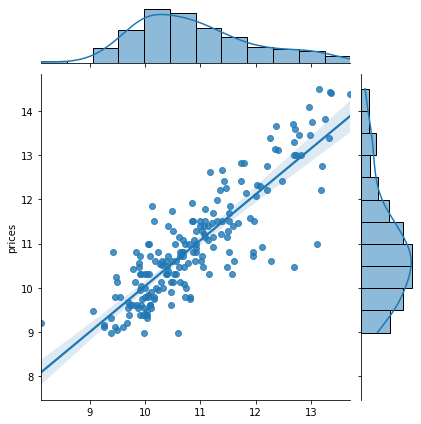

In [62]:
preds = ML.predict(X_test) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y_test, kind='reg')

### Ridge:

In [66]:
ML_model_ridge = Ridge(alpha=1.0)
ML_model_ridge.fit(X_train,y_train)
ML_model_ridge.score(X_train,y_train)

0.7102477440256312

In [67]:
ML_model_ridge.score(X_test,y_test)

0.7270884505652344

In [68]:
from sklearn.metrics import mean_squared_error
pred = ML_model_ridge.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
rmse

0.6665223589516838

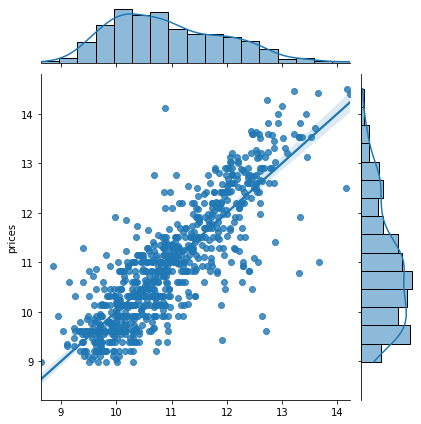

In [69]:
preds = ML_model_ridge.predict(X_train) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y_train, kind='reg')

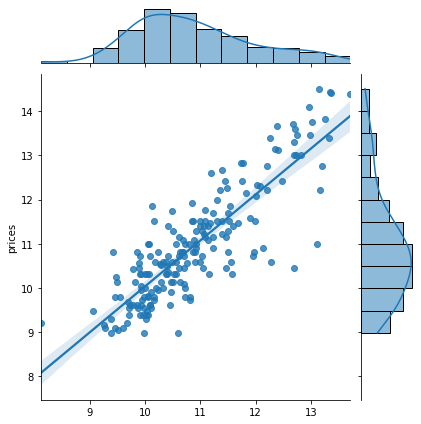

In [70]:
preds = ML_model_ridge.predict(X_test) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y_test, kind='reg')